In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


In [30]:
from tensorflow import keras

model = keras.models.Sequential([
    # Since the dataset is quite noisy, we just use a single hidden layer
    # with fewer neurons than before, to avoid overfitting
    keras.layers.Dense(40, activation="relu", input_shape=X_train_scaled.shape[1:]),

    # the output layer has a single neuron (since we only want to
    # predict a single value) and uses no activation function
    # and the loss function is the mean squared error
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")

In [31]:
history = model.fit(X_train_scaled, y_train, epochs=20, validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1000us/step - loss: 0.7732 - val_loss: 0.6927
Epoch 2/20
363/363 [==============================] - 0s 790us/step - loss: 1.0142 - val_loss: 0.4928
Epoch 3/20
363/363 [==============================] - 0s 748us/step - loss: 0.4639 - val_loss: 0.4463

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled)

print(y_pred[0][0], y_test[0])

mean_squared_error(y_test.reshape(-1, 1), y_pred)


1.2350572 1.938


0.3556423644804147

In [34]:
input = keras.layers.Input(shape=X_train_scaled.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input], outputs=[output])


In [35]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_valid_scaled, y_valid))

Epoch 1/50
363/363 [==============================] - 0s 967us/step - loss: 0.5024 - val_loss: 1.3696
Epoch 2/50
363/363 [==============================] - 0s 881us/step - loss: 0.5290 - val_loss: 0.5323
Epoch 3/50
363/363 [==============================] - 0s 837us/step - loss: 0.4788 - val_loss: 0.5428

162/162 [==============================] - 0s 604us/step - loss: 0.3775


<AxesSubplot:>

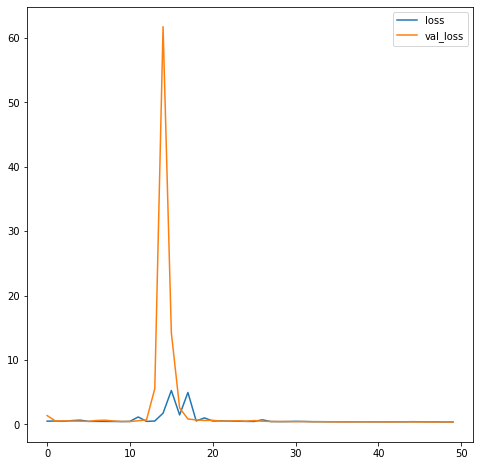

In [43]:
import pandas as pd

model.evaluate(X_test_scaled, y_test)

pd.DataFrame(history.history).plot(figsize=(8, 8))